# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
df = pd.read_csv('data/human_body_temperature.csv')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Text(0.5,1,'Boxplot of temperature values for the sample')

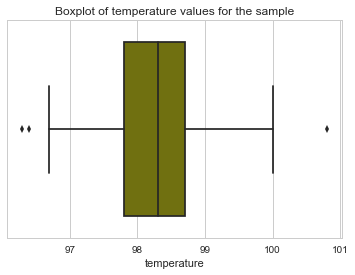

In [219]:
sns.boxplot(df['temperature'],color='olive')
plt.title('Boxplot of temperature values for the sample')

Result of normal test: NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


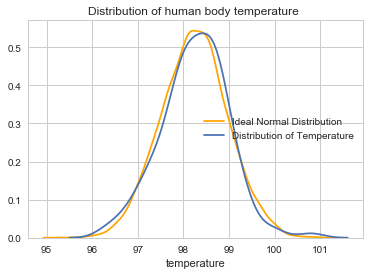

In [220]:
# Plot the distribution of temperature and compare with normal distribution of same mean and variancw
ideal_normal = np.random.normal(df.temperature.mean(),df.temperature.std(),size=10000)
sns.distplot(ideal_normal,hist=False,color='orange',label='Ideal Normal Distribution')
sns.distplot(df.temperature,hist=False,label='Distribution of Temperature')
plt.title('Distribution of human body temperature ')
print("Result of normal test:",stats.normaltest(df.temperature))

### Answers to first 3 questions:
<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> The population (as defined in statistics) is body temperatures of all humans in the world. The population distribution is not normal (meaning, does not resemble Gaussian distribution), because it can not fall below a certain positive value, and it cannot go above a positive value around the mean for people who are alive. If conditions for CLT are met, it does not matter whether the population distribution is Gaussian or not. 
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Sample size is 130, which is > 30 for CLT to apply for a nearly normal distribution. From the sample histogram above, it is nearly normal, although a little left-skewed as seen from the boxplot. 
    <li> The observations are assumed to be independent in the absence of anymore data, if sample size is less than 5% of the population size, and we know that certainly population size is more than 2600. Sometimes, even sample with size as big as 10% (and not more) of the population is also assumed to be independent.
    </ul>
    <li>  Is the true population mean really 98.6 degrees F?
    <ul> 
    <li> To answer this, we will need to conduct a few statistical hypothesis test. Even after conducting tests, we cannot say if population mean is or is not really 98.6 degrees. We can say how confident we are that population mean is different from 98.6 degrees.
    <li> We would conduct a one-sample test here, because the intent here is to answer a question on one mean using one sample of size 130 from a population. Intent is not to compare two different population parameters or two different samples of same population. 
    <li> Since sample size is large compared to 30, and sample resembles Gaussian distribution, we would use z-statistics.
    <li> We would use t-statistics and report the results too.
    </ul>
</ol>

In [221]:
# Find out the sample statistics on temperature
df_stats = df.temperature.describe()
df_stats

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Observations
We note that sample mean rounded to 2 decimal points is 98.25 deg F, which is less than reported population mean of 98.6 deg F. Hence we have some reason to suspect that mean body temperature may be different from 98.6 deg. 

### Setting and conducting Hypothesis test
The observed value might be different from 98.6 deg (which is statistically referred to as null value) just by chance. We will check this out, by setting our hypothesis with a predefined significance level, and conducting a two sided hypothesis z-test.

+ H0: Mean body temperature, mu = 98.6 deg
+ HA: Mean body temperature mu != 98.6 deg
+ Significance level alpha = 0.01, corresponding to 99% confidence level (as this is two sided test, from the question).

This means, if we get a p-value less than 0.01, we would reject null hypothesis in favor of alternative hypothesis.
Before that, let us also calculate what is the minimum required sample size for achieving 99% confidence.
z score corresponding to 99% confidence interval is: 2.58 Ref: https://en.wikipedia.org/wiki/Standard_normal_table

In [222]:
# From the formula, zscore = (xbar - mu)/SE
# As we don't have information on SD of the population, we can take it as SD of sample, so SE = df_stats.std/sqrt(n)
# zscore = (df_stats.mean - 98.6)/(df_stats.std/np.sqrt(n))
# Squaring and substituting for zscore,
z_99 = 2.58
n = (z_99*df_stats[2]/(df_stats[1] - 98.6))**2
print("Minimum sample size for 99% confidence interval", round(n+0.5))

Minimum sample size for 99% confidence interval 30.0


Since our sample size is 130, much larger than 30, the standard error is smaller than the one in the above calculation, hence z score is higher than 2.58, confidence interval corresponding to 99% is narrower than 2*(mu-sample_mean). This means the population mean does not lie in the 99% confidence interval around sample mean, and we can reject null hypothesis in favor of alternative hypothesis. This can be done mathematically by calculating z-score for 130, using the table. p-value can also be computed with bootstrap method. Both are done below for learning.

In [223]:
# With sample of size 130, z statistic is
z = abs(df.temperature.mean()-98.6)/(df.temperature.std()/np.sqrt(130))
print("With sample size = 130, z-score for the given sample:",round(z,3))

With sample size = 130, z-score for the given sample: 5.455


In [224]:
# For two sided hypothesis test, p- value is P(abs(z) >= 5.455 | mu = 98.6)
pval = 2*(1 - stats.norm.cdf(abs(z)))
print("Pvalue computed using zstatistic and builtin function is",pval)
print("Confidence Level corresponding to this p-value is {}v%".format((1-pval)*100))

Pvalue computed using zstatistic and builtin function is 4.90215701365e-08
Confidence Level corresponding to this p-value is 99.99999509784298v%


### Interpretation
+ Pvalue means, P (Random samples of size 130 from population having mean body temperature of 98.25 deg F or less or 98.95 deg or more | actual mean body temperature is 98.6 deg F) = 4.9e-08, i.e. almost zero.
+ As pvalue is < 0.01 (alpha set in the beginning), **We reject null hypothesis that mu=98.6 deg F, in favor of alternate hypothesis that mu != 98.6 deg F**
+ The confidence level value implies "The confidence interval corresponding to 99.999995% confidene level around observed sample mean 98.25deg F does not contain the null value 98.6 deg F. 

In [225]:
# We will test if H0 should be rejected in favor or HA using bootstrap method:
# First step, write a function for bootstrap replicates
import numpy as np
def draw_bs_reps(data, func, size=1,len_d=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates by resampling with replacement
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,len_d))
    return bs_replicates

In [226]:
# Draw bootstrap replicates
emp_mean = df.temperature.mean()
mu = 98.6
bs_reps = draw_bs_reps(df.temperature,np.mean,100000,len_d = len(df.temperature))
me = abs(mu-emp_mean)
left_limit = emp_mean - (me)
right_limit = emp_mean + me
pval_bs = (np.sum(bs_reps <= left_limit) + np.sum(bs_reps >= right_limit))/len(bs_reps)
print("Pvalue computed using Bootstrap replicates:",pval_bs)

Pvalue computed using Bootstrap replicates: 0.0


### Interpretation
+ We get pvalue 0 < 0.01, which enables us to reject H0 in favor of HA
+ The result of the test agrees with that obtained by using z-statistic method. p value is 0 because there are not enough number of replicates. (It takes a very long time for simulations above the size 100000.)

In [227]:
# Doing the other test, i.e. 1 sample t test
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### Comment
Since sample size is 130, t-distribution approaches normal distribution. Hence essentially we see the same value as z-score for t-statistic. The p-value is also small indicating rejection of H0

### Answer to Question 4
In this case, we will have to take the given sample as population from which a small sample of 10 is drawn. Since 130 is more than 10 times of 10, we can draw randomly without replacement and assume independence.
For sample size 10, 1 sample t test needs to be performed. We will do both tests and compare, as needed by the exercise.

In [228]:
#Let us take 10 samples without replacement
samples10 = np.random.choice(a=df.temperature,size=10,replace=False)
# 1 sample t test
(tstat10,ttestpval10) = stats.ttest_1samp(samples10,98.6)
# With sample of size 10, zscore
z10 = np.abs(np.mean(samples10)-98.6)/(np.std(samples10)/np.sqrt(10))
print("t-stat with sample size 10:",abs(tstat10))
print("z-stat with sample size 10:",z10)
pval10 = 2*(1 - stats.norm.cdf(abs(z10)))
print("Pvalue computed using t-stat and builtin function is",ttestpval10)
print("Pvalue computed using z-stat and builtin function is",pval10)

t-stat with sample size 10: 2.49224148221
z-stat with sample size 10: 2.62705318764
Pvalue computed using t-stat and builtin function is 0.0342956452764
Pvalue computed using z-stat and builtin function is 0.0086127870496


### Comments on the results of Question 4
+ Since the samples are randomly chosen from given sample set, each run gives slightly different results.
+ We notice that in every run, 
  - t-stat is slightly lower than z-stat
  - pvalue computed with z-stat is lower than that of pvalue computed with t-statistic.
+ pvalue computed with z-stat is lower because normal distribution has thinner tails than t-distribution, has more spread. 
+ Having lower p-value means statistically more significant, and less conservative measure. Therefore, for small sample sizes, z-stat which gives false statistically significant picture, should not be used. t
+ Conclusion is t-stat is the more appropriate measure for small sample sizes, as it is more realistic than z-stat.

### For Question 5:
We take our observed mean of samples as the estimate of population mean (with a margin of error that will be stated), and standard deviation of given samples as the population's standard deviation. Thumbrule for testing whether something is abnormal is to see if it is more than 3 standard deviations away from the mean.

In [229]:
# Measure margin of error
margin_of_error = 3*df_stats[2]
print('Margin of error for 99.7% confidence interval',margin_of_error)
ci_tuple = (round(df_stats[1]-margin_of_error,2),round(df_stats[1]+margin_of_error,2))
print('99.7% confidence interval of the population mean:',ci_tuple)

Margin of error for 99.7% confidence interval 2.19954947412
99.7% confidence interval of the population mean: (96.049999999999997, 100.45)


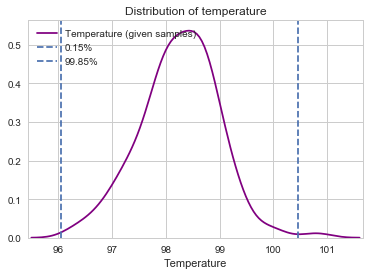

In [230]:
# Plotting 99.9% confidence interval and also null value
sns.distplot(df.temperature,hist=False,color='purple',label='Temperature (given samples)')
plt.axvline(ci_tuple[0],linestyle='--',label='0.15%')
plt.axvline(ci_tuple[1],linestyle='--',label='99.85%')
plt.xlabel('Temperature')
plt.title('Distribution of temperature')
plt.margins(0.01)
plt.legend(loc = 'upper left')

### Answer to Quesiton 5

The human body temperature can be considered abnormal, if it falls below 96.05 deg F or shoots above 100.45 deg F.

### Answer to Question 6
To find out whether there is statistically significant difference between mean body temperature of male and female, we conduct two sample z-test. This is because
+ Two means are involved
+ Those two means come from two independent samples
+ The sample size of each is still large enough to conduct a z-test and t-test is not to be used.

Here also we have the option of using builtin functions or bootstrap method. First we should set the hypothesis and set significance level, checking the conditions (which is already done just now above)

H0: mu of male body temperature = mu of female body temperature

HA: mu of male body temperature != mu of female body temperature

significance level alpha = 0.01 corresponding to a confidence level of 99%

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64
count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64


Text(0.5,1,'Box plots of temperature')

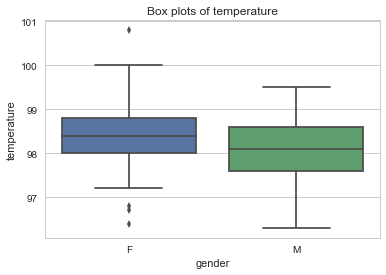

In [231]:
# Quickly do numerical and visual EDA first
lt = df.loc[df.gender == 'F']['temperature']
mt = df.loc[df.gender == 'M']['temperature']
print(lt.describe())
print(mt.describe())
_ = sns.boxplot(x='gender',y='temperature',data=df)
plt.title('Box plots of temperature')

Text(0.5,1,'Distribution of Female and Male body temperature')

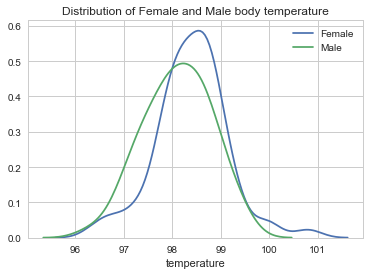

In [232]:
sns.distplot(lt,hist=False,label='Female')
sns.distplot(mt,hist=False,label='Male')
plt.title('Distribution of Female and Male body temperature')

### Observations
+ There is a clear difference in means of two samples which can not be ignored.
+ The box plot and the distribution plots also indicate there might be difference in distributions as well.
+ Male body temperatures are closer to normal distribution than their female counterparts, but both are nearly normal and hence CLT can be applied.

In [233]:
# Conduct two sample z-statistic test
common_se = np.sqrt((lt.std()**2+mt.std()**2)/len(mt))
z_score = (lt.mean() - mt.mean())/common_se
print("z-stat for the two sample means with common standard error =",z_score)
pval_2samp= 2*(1 - stats.norm.cdf(abs(z_score)))
print("pvalue obtained for two sample z-test",pval_2samp)

z-stat for the two sample means with common standard error = 2.28543453817
pvalue obtained for two sample z-test 0.0222873607607


p-value computed using z-stat and builtin method is 0.0222 > 0.01. **Hence there is not enough evidence to reject null hypothesis.** This observed difference could be purely by chance.

In [234]:
# Now using bootstrap method.
def diff_means(d1,d2):
    """Compute difference of means"""
    return np.mean(d1) - np.mean(d2)

def draw_2samp_perm_reps(data_1, data_2, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty([size,130])

    for i in range(size):
        # Generate permutation sample
        permuted_data = np.random.permutation(np.concatenate([data_1,data_2],axis=0))

        # Store all such combinations
        perm_replicates[i,:] = permuted_data.T

    #print(permuted_data.T.shape)
    return perm_replicates

In [235]:
# Compute empirical difference as difference in sample means
emp_diff_means = diff_means(lt,mt)
# Draw permutation replicates of combined array
perm_reps_2samp = draw_2samp_perm_reps(lt,mt,size=10000)

p-value = 0.0248


Text(0.5,0,'Difference of means')

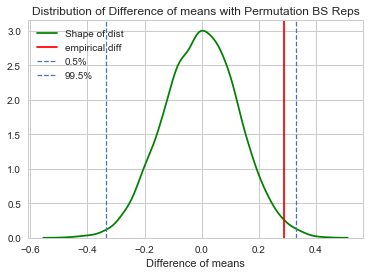

In [236]:
# Split the permutation into two sets of samples, in this case sample lengths are equal.
part1 = perm_reps_2samp[:, :len(list(lt))]
part2 = perm_reps_2samp[:, len(list(lt)):]
# Compute difference between means of two parts
perm_diff_of_means = np.mean(part1,axis=1) - np.mean(part2,axis=1)
sns.distplot(perm_diff_of_means, hist=False,color='green',label='Shape of dist')
plt.axvline(emp_diff_means,color='red',label='empirical diff')
plt.axvline(np.percentile(perm_diff_of_means, 0.5), linestyle='--',linewidth=1.25,label='0.5%')
plt.axvline(np.percentile(perm_diff_of_means, 99.5), linestyle='--',linewidth=1.25,label='99.5%')
# Compute and print p-value for the hypothesis 
print("p-value =", 2*np.sum(perm_diff_of_means >= np.abs(emp_diff_means))/10000)
plt.legend(loc='upper left')
plt.title('Distribution of Difference of means with Permutation BS Reps')
plt.xlabel('Difference of means')

Recall that the above plot is obtained by,
- Drawing permutations from the original sample of size 130, meaning all 130 samples are present, but their order is shuffled.
- Treating first 65 as female temperatures and next 65 as male temperatures. 
- Taking the difference between means of these two sets.
- Plotting the difference.

### Interpretation of the plot

+ As one would expect/guess, the curve has peak at 0. Most of such permutations yield two sample sets with same mean.
+ The observed difference in the means of female body temperature and male body temperature lies within the 99% confidence interval of the above distribution, thus making it **impossible to reject the null hypothesis that mean body temperature of female and male bodies are same.**
+ P-value here means P(abs diff between male and female population means >= observed difference | diff follows the distribution above), came to be 0.026 > 0.01, which is agreeing with the above statement.

## Summary:
1. There is evidence to believe that the average human body temperature is different from 98.6 deg, at the fixed significance level of 0.01
2. Further, statistical tests indicated that if the given sample is assumed to be a fair representation of true population, the true average human body temperature is 98.25 deg +/ 0.167 with a confidence level of > 99.99%
3. We could consider a human body temperature abnormal, if the temperature lies outside of [96.05,100.45] deg F
4. The observed difference in mean body temperatures of male and female has no statistical significance at the significance level fixed, i.e.0.01.